# Delayed tasks analysis


### Convert notebook to python
```
bash
jupyter nbconvert "D:\OneDrive - Nexus365\Private_Dropbox\Projects\trialexp\notebooks\noncanonical\nb20230202_145400_delayed_tasks_and_316_photometry.ipynb" --to="python" --output-dir="D:\OneDrive - Nexus365\Private_Dropbox\Projects\trialexp\notebooks\noncanonical" --output="nb20230202_145400_delayed_tasks_and_316_photometry"
```

Quick analysis of instrumental reaching

In [90]:
# allow for automatic reloading of classes and function when updating the code
%load_ext autoreload
%autoreload 2 

# Import Session and Experiment class with helper functions
from trialexp.process.data_import import *



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Variables

In [91]:
import pandas as pd
from pathlib import Path
trial_window = [-4000, 8000] # in ms

# time limit around trigger to perform an event
# determine successful trials
timelim = [1000, 4000] # in ms

# Digital channel nb of the pyphotometry device
# on which rsync signal is sent (from pycontrol device)
rsync_chan = 2

basefolder = Path(os.getcwd()).parent.parent

# These must be absolute paths
# use this to use within package tasks files (in params)
tasksfile = Path(basefolder,'params','tasks_params.csv')
# use this to put a local full path
#tasksfile = -r'C:/.../tasks_params.csv' 

# from sample_data

# # From jade
# photometry_dir = Path('/home/MRC.OX.AC.UK/phar0732/ettin/Data/head-fixed/photometry')
# pycontrol_dir = Path('/home/MRC.OX.AC.UK/phar0732/ettin/Data/head-fixed/pycontrol')

# # From julien-pc
photometry_dir = r'\\ettin\Magill_Lab\Julien\Data\head-fixed\test_folder\delayed_go\pyphotometry\delayed_go_dual_2022'
pycontrol_dir = r'\\ettin\Magill_Lab\Julien\Data\head-fixed\test_folder\delayed_go\pycontrol\delayed_go_dual_2022'

# From laptop
# photometry_dir = r'C:\Users\phar0732\Documents\GitHub\trialexp\sample_data\pyphotometry'
# pycontrol_dir = r'C:\Users\phar0732\Documents\GitHub\trialexp\sample_data\pycontrol'

video_dir = r'\\ettin\Magill_Lab\Julien\Data\head-fixed\videos'
tasks = pd.read_csv(tasksfile, usecols=[1, 2, 3, 4], index_col=False)


### Create an experiment object


In [92]:
# Load all raw text sessions in the indicated folder or a sessions.pkl file
# if already existing in folder_path
exp_cohort = Experiment(path=pycontrol_dir, int_subject_IDs=True, update=True, verbose=False)

Saved sessions loaded from: sessions.pkl


### Perform extraction of behavioural information by trial

In [93]:
# Process the whole experimental folder by trials


exp_cohort.process_exp_by_trial(trial_window, timelim, tasksfile, verbose=True)

# Save the file as sessions.pkl in folder_path
# exp_cohort.save()

processing by trial: JC316L-2022-12-07-162916.txt task: reaching_go_spout_bar_dual_dec22
processing by trial: JC316L-2022-12-07-163252.txt task: reaching_go_spout_bar_dual_dec22
processing by trial: JC316L-2022-12-07-164420.txt task: reaching_go_spout_bar_dual_dec22
processing by trial: JC317L-2022-12-07-182526.txt task: reaching_go_spout_bar_dual_dec22
processing by trial: JC318L-2022-12-07-182825.txt task: reaching_go_spout_bar_dual_dec22
processing by trial: JC318L-2022-12-07-183239.txt task: reaching_go_spout_bar_dual_dec22
processing by trial: JC317L-2022-12-07-183315.txt task: reaching_go_spout_bar_dual_dec22
processing by trial: JC318L-2022-12-07-183737.txt task: reaching_go_spout_bar_dual_dec22
processing by trial: JC317L-2022-12-07-183817.txt task: reaching_go_spout_bar_dual_dec22
processing by trial: JC318L-2022-12-07-184014.txt task: reaching_go_spout_bar_dual_dec22
processing by trial: JC316L-2022-12-08-125551.txt task: reaching_go_spout_bar_dual_dec22
processing by trial: 

### Conditions for delayed go

In [94]:
# Defime each trial type as a dictionary of conditions to be met
# Defime each trial type as a dictionary of conditions to be met
conditions_dict1 = {'trigger': 'hold_for_water', 'success': True, 'valid': True, 
    'hold_timer': True, 'water by bar_off': False, 'water for free': False} 
conditions_dict2 = {'trigger': 'hold_for_water', 'valid': True, 'hold_timer': False,
    'break_after_abort': True, 'US_end_timer': False, 'success': False, 'button_press': False}

# conditions_dict2 = {'trigger': 'hold_for_water', 'spout':False, 'valid': True, 'busy_win_timer': False, 'button_press': False}

# Aggregate all condition dictionaries in a list
condition_list = [conditions_dict1, conditions_dict2]
# Aliases for conditions
cond_aliases = ['Go - hold', 'Go - aborted']
# Groups as a list of lists
# groups = [[280, 281, 282, 289],[295, 282, 284, 285, 292, 297]]
groups = None

# Window to exctract (in ms)


In [95]:
ev_dataset = exp_cohort.behav_events_to_dataset(
        groups = groups,
        conditions_list = condition_list, 
        cond_aliases = cond_aliases, 
        when =['2022-11-08',...,'2022-12-25'], 
        task_names = ['reaching_go_spout_bar_dual_dec22' ,'reaching_go_spout_bar_dual_all_reward_dec22'], #'pavlovian_nobar_nodelay', #'reaching_go_nogo',
        trig_on_ev = None)

ev_dataset.set_trial_window(trial_window=[-1000,4000], unit='milliseconds')
ev_dataset.set_conditions(conditions=condition_list, aliases=cond_aliases)

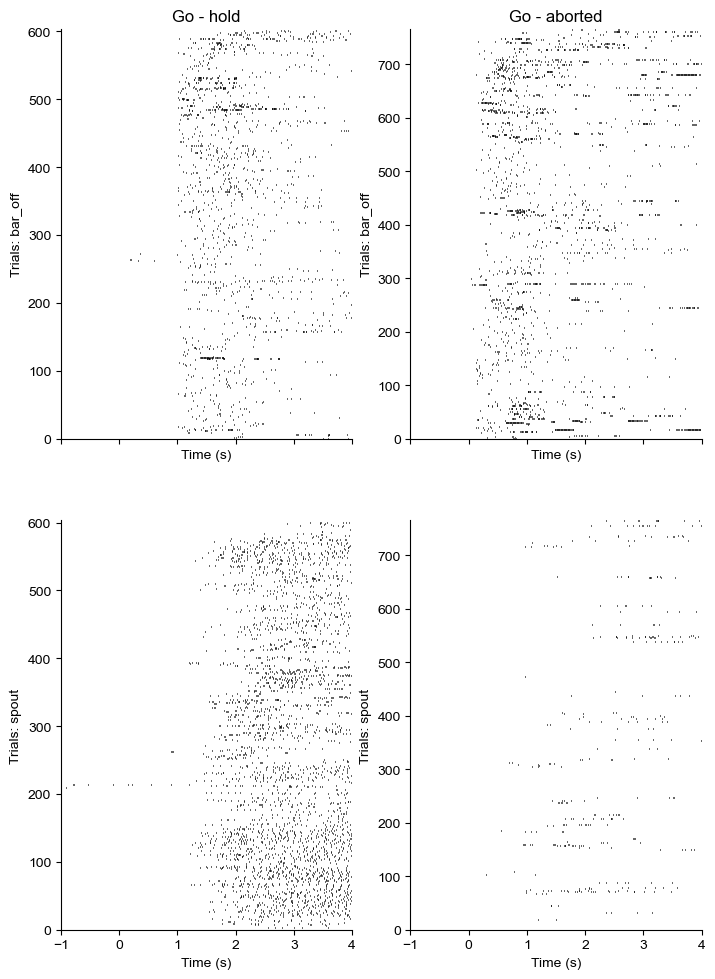

In [96]:
ev_dataset.filter_reset()
tf = (ev_dataset.get_tfkeep_subjects([316,317,318])) & (ev_dataset.get_tfkeep_dates(date(2022,12,16)))
# tf = (ev_dataset.get_tfkeep_subjects([316,317,318]))
# ev_dataset.set_keep(tf)

ev_dataset.plot_raster(keys=['bar_off_trial_time','spout_trial_time'], module='matplotlib')


Behaviour: Compute distribution

In [97]:
dist_as_continuous = ev_dataset.compute_distribution(
        trial_window = [-1999, 10000],
        bin_size = 100, # do not work as expected with cued-uncued
        normalize = True,
        per_session = True,
        out_as_continuous = True)
dist_as_continuous.set_conditions(conditions=condition_list, aliases=cond_aliases)
# Remove test files
# dist_as_continuous.filterout_subjects([0])

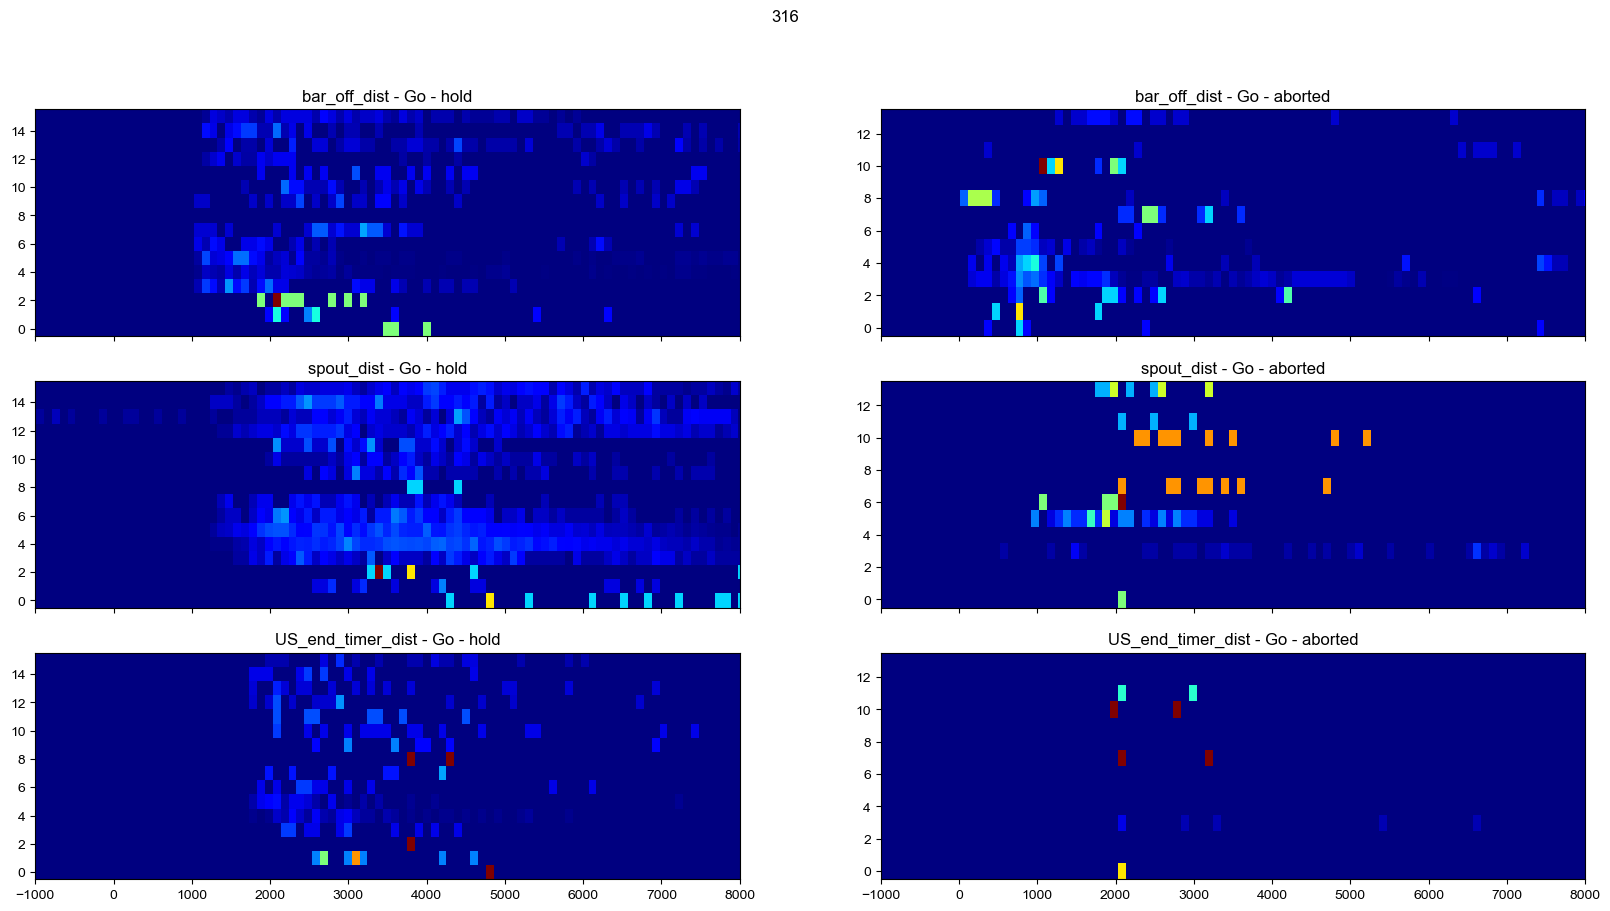

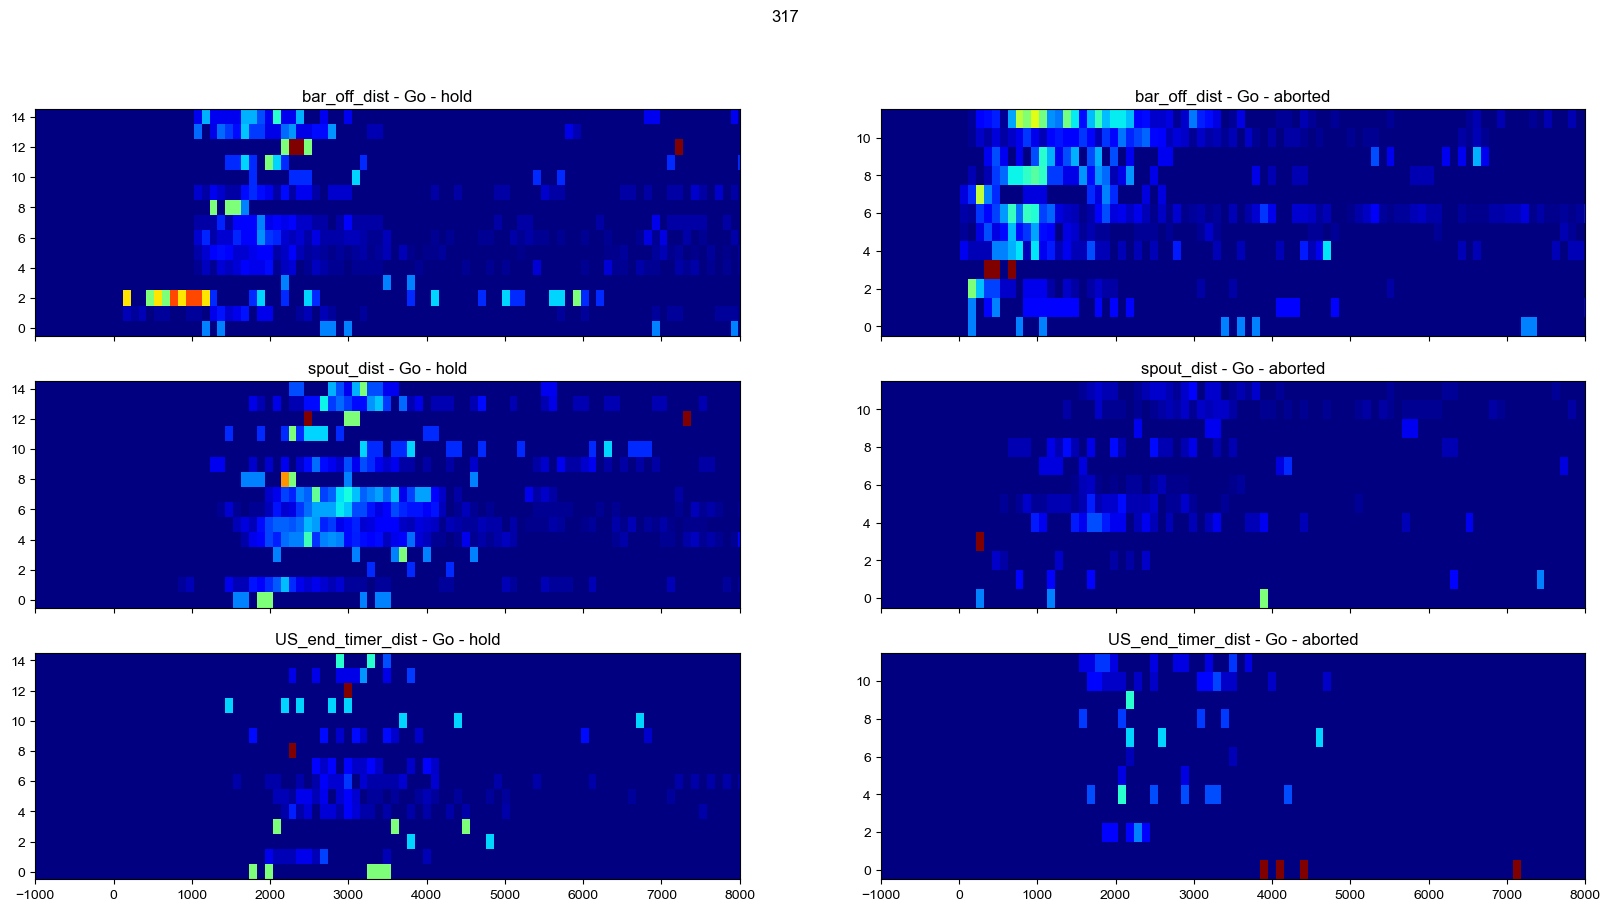

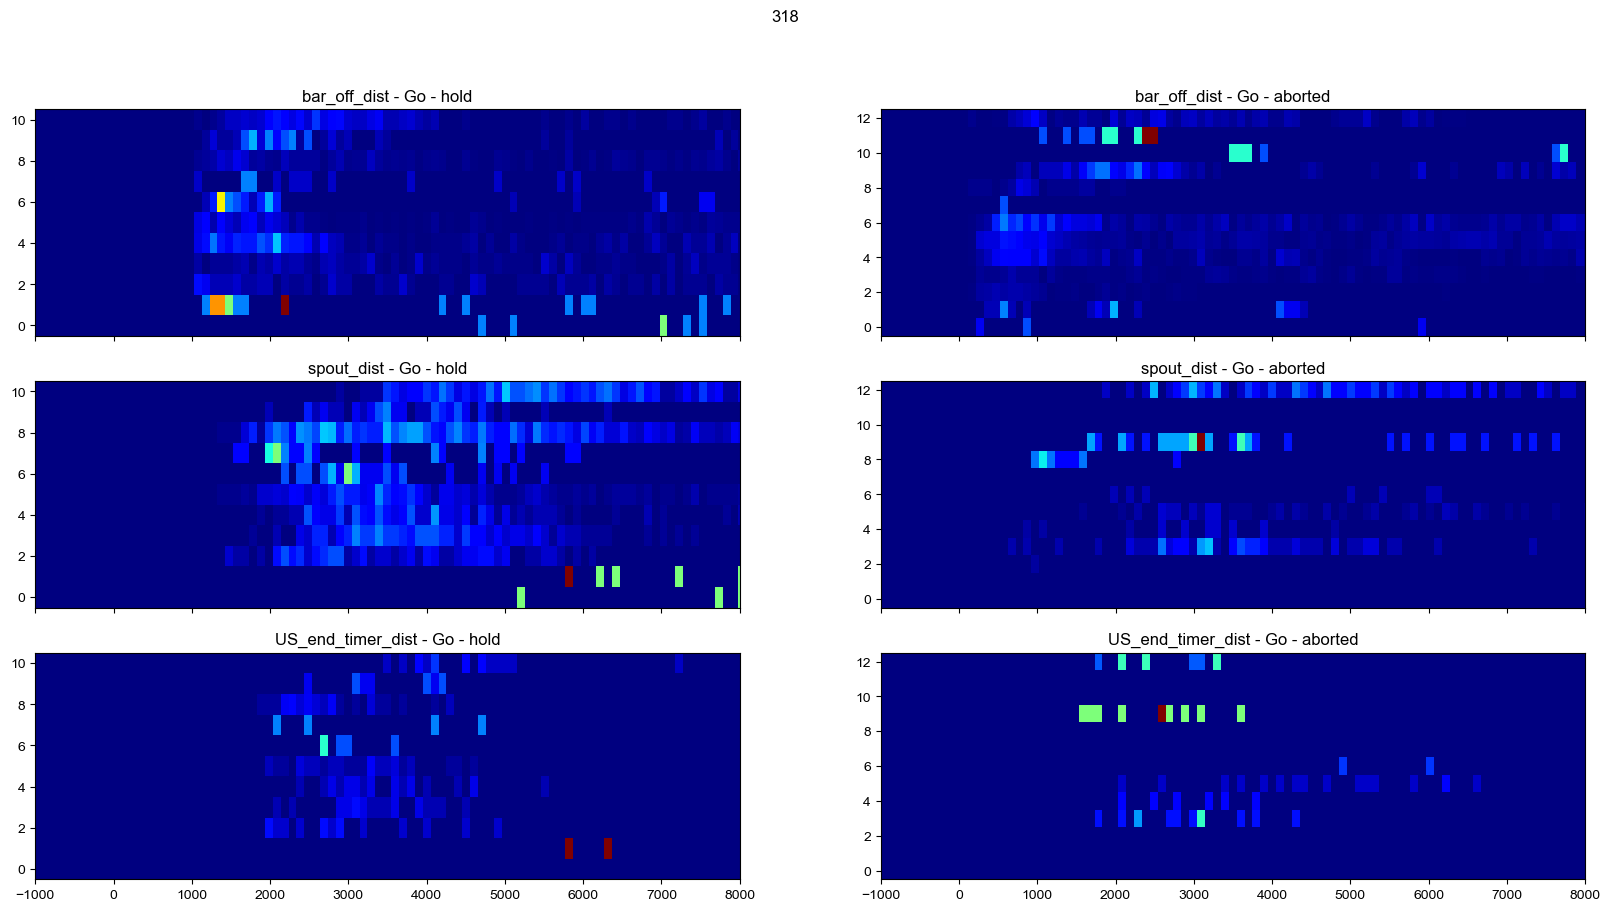

In [98]:
dist_as_continuous.heatmap(
    vars = ['bar_off_dist', 'spout_dist', 'US_end_timer_dist'],
    time_lim = [-1000, 8000],
    colormap = 'jet'
)

### Optional methods

- Implementation of these optional filtering options is first understood as removing subjects, groups, conditions...
- It is a non-permanent way of discarding elements for analysis
- It is based on a "keep" column in the metadata that is True by default and set to False with the filtering function.
- At anytime, <trial_dataset>.filter_reset() can be called to re-include all the elements in the analysis (set all "keep" to True)
- Comment or uncomment lines and fill the lists according to your needs

In [99]:
# Get a list of the groups
dist_as_continuous.get_groups()
# Get a list of the variables
dist_as_continuous.get_col_names()

# reset previous filtering of the dataset
dist_as_continuous.filter_reset()

# exclude some conditions by IDs
# dist_as_continuous.filter_out_conditions([])

# # exclude some groups by IDs
# dist_as_continuous.filter_out_groups([])

# exclude some subjects
dist_as_continuous.filterout_subjects([313,314,315])
#     subjects_IDs_to_exclude = [289, 290, 293, 294, 295, 299, 301, 303, 304, 305, 306])
dist_as_continuous.filter_lastNsessions(3)
# dist_as_continuous.filterout_dates([])

# filter subjects/sessions with less than x trials (by condition)
# dist_as_continuous.filter_min(min_trials = 1)

# To remove subjects who do not have trials
# in all the conditions, if called after filter_min(),
# will discard any subject who do not have the minimum number
# of trials in all the conditions

# dist_as_continuous.filter_if_not_in_all_cond()


Behaviour: Plot distribution

False    55
True     26
Name: keep, dtype: int64

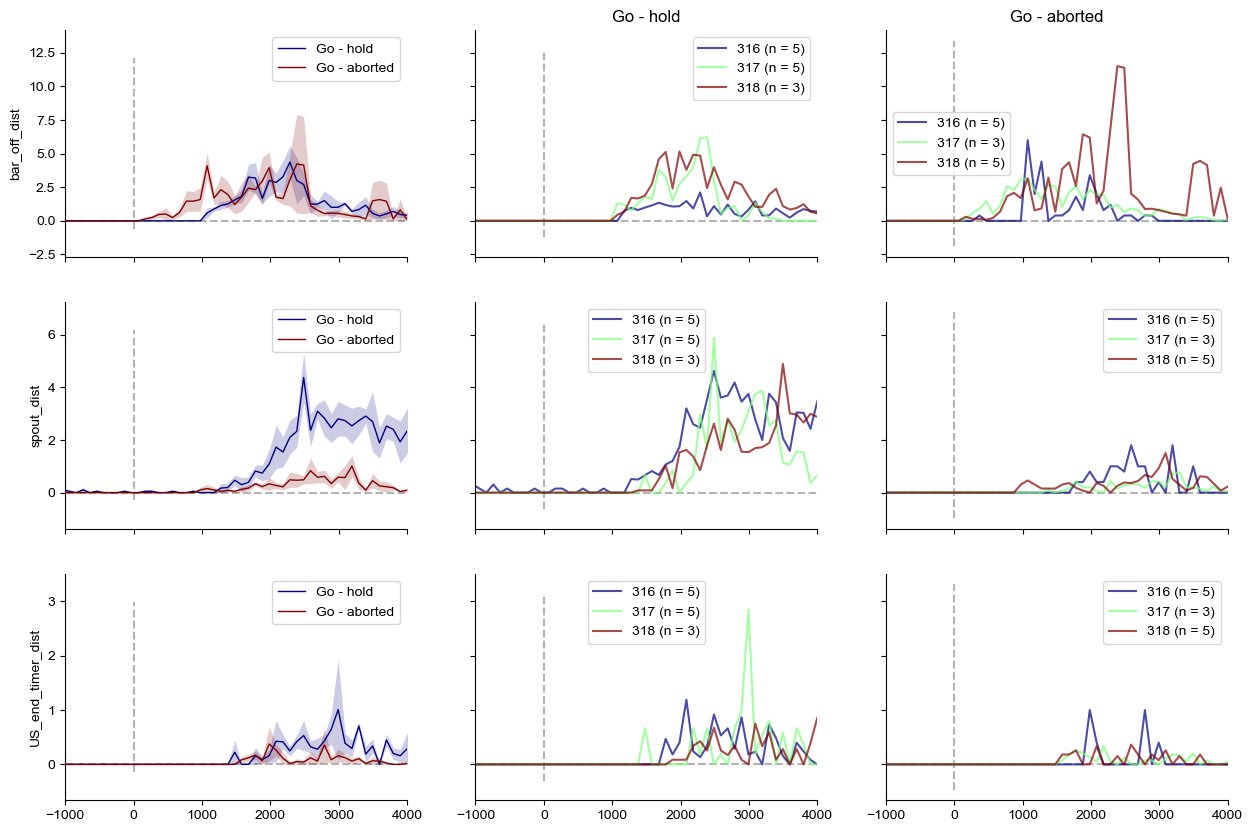

In [100]:
dist_as_continuous.filter_reset()
dist_as_continuous.filter_lastNsessions(n = 5)
dist_as_continuous.lineplot(
    vars = [ 'bar_off_dist','spout_dist','US_end_timer_dist'],
    time_lim = [-1000,4000],
    error = True,
    ylim = None,#[[-0.1,1.6]], #[[-0.1, 0.7]], #[[-0.1, 1]],#,[-0.005, 0.007]],#[[-0.001, 0.0011],[-0.001, 0.0011]],
    colormap = 'jet',
    legend = True,
    plot_subjects = True,
    plot_groups = True,
    figsize = (15,10),
    dpi = 100,
    verbose = False)
# Return a count of overall number of trials
dist_as_continuous.metadata_df['keep'].value_counts()


## Match and synchronize photometry to behaviour

In [101]:
# Find if there is a matching photometry file:
exp_cohort.match_sessions_to_files(photometry_dir, ext='ppd')

# rsync synchronization pulses matching between behaviour and photometry
exp_cohort.sync_photometry_files(2)
exp_cohort.save()


d:\onedrive - nexus365\private_dropbox\projects\trialexp\trialexp\utils\rsync.py:78: RuntimeWarning:

invalid value encountered in log



saved \\ettin\Magill_Lab\Julien\Data\head-fixed\test_folder\delayed_go\pycontrol\delayed_go_dual_2022\sessions.pkl


In [102]:
# exp_cohort.match_sessions_to_files(video_dir, ext='mp4')
# exp_cohort.match_sessions_to_files(video_dir, ext='h5')

In [103]:
exp_cohort.save('20230131_sample_delayed_sessions')

saved \\ettin\Magill_Lab\Julien\Data\head-fixed\test_folder\delayed_go\pycontrol\delayed_go_dual_2022\20230131_sample_delayed_sessions.pkl


Loop to plot photometry trials triggered on different events
- 1: Trial onset (CS-onset = hold period start)
- 2: First bar_off
- 3: Last bar_off before spout
- 4: First spout
- 5: Reward (US_end_timer)

In [104]:

trigs = [None, 'bar_off', 'bar_off', 'spout', 'US_end_timer']
last_befores = [None, None, 'spout', None, None]

photo_dataset = dict()
for idx, trig in enumerate(trigs):
    photo_dataset[idx] = exp_cohort.get_photometry_groups(
            groups = None, # or use groups variable defined above
            conditions_list = condition_list, 
            cond_aliases = cond_aliases,
            trial_window = trial_window,
            when = 'all', 
            task_names = ['reaching_go_spout_nov22','reaching_go_spout_bar_nov22', 'reaching_go_spout_bar_dual_dec22' ,'reaching_go_spout_bar_dual_all_reward_dec22'],
            trig_on_ev = trig, # align to the first event of a kind e.g. bar_off
            last_before = last_befores[idx],
            high_pass = None, 
            low_pass = 45, 
            median_filt = 3,
            motion_corr = True, 
            df_over_f = True, 
            downsampling_factor = 10, 
            export_vars = ['analog_1','analog_1_filt','analog_2','analog_2_filt','analog_1_df_over_f'], 
            # remove_artifacts = False, # To Deprecate in favor of Exp level artifact clustering
            verbose = False) # will plot all the process of remove_artifacts if remove_artifacts == True



No trial in any condition for subject 317 at: 2022-12-15 14:55:30
No trial in any condition for subject 317 at: 2022-12-16 17:42:18
No trial in any condition for subject 318 at: 2022-12-08 14:29:10
No trial in any condition for subject 317 at: 2022-12-15 14:55:30
No trial in any condition for subject 316 at: 2022-12-08 12:55:51
No trial in any condition for subject 316 at: 2022-12-08 14:26:30
No trial in any condition for subject 317 at: 2022-12-15 14:55:30
No trial in any condition for subject 318 at: 2022-12-07 18:32:39
No trial in any condition for subject 318 at: 2022-12-07 18:37:37
No trial in any condition for subject 316 at: 2022-12-08 12:55:51
No trial in any condition for subject 316 at: 2022-12-08 14:26:30
No trial in any condition for subject 317 at: 2022-12-15 14:55:30
No trial in any condition for subject 318 at: 2022-12-07 18:32:39
No trial in any condition for subject 318 at: 2022-12-07 18:37:37
No trial in any condition for subject 316 at: 2022-12-08 12:55:51
No trial i

Plot photometry trials triggered on different events based on above extraction
- 1: Trial onset (CS-onset = hold period start)
- 2: First bar_off
- 3: Last bar_off before spout
- 4: First spout
- 5: Reward (US_end_timer)

In [105]:

bad_days = photo_dataset[0].metadata_df[photo_dataset[0].metadata_df.subject_ID == 316].datetime.unique()[-3:]
bad_days = [pd.to_datetime(bad_day) for bad_day in bad_days]
photo_dataset[0].metadata_df[photo_dataset[0].metadata_df.subject_ID == 316].datetime.unique()

array(['2022-12-07T16:29:16.000000000', '2022-12-07T16:44:20.000000000',
       '2022-12-08T12:55:51.000000000', '2022-12-08T14:26:30.000000000',
       '2022-12-08T14:30:46.000000000', '2022-12-09T17:19:25.000000000',
       '2022-12-11T20:26:00.000000000', '2022-12-19T09:42:41.000000000'],
      dtype='datetime64[ns]')

cond_ID: 0, group_idx 0, subj 316
cond_ID: 1, group_idx 0, subj 316
cond_ID: 0, group_idx 0, subj 316
cond_ID: 1, group_idx 0, subj 316
cond_ID: 0, group_idx 0, subj 316
cond_ID: 1, group_idx 0, subj 316
cond_ID: 0, group_idx 0, subj 316
cond_ID: 1, group_idx 0, subj 316
cond_ID: 0, group_idx 0, subj 316


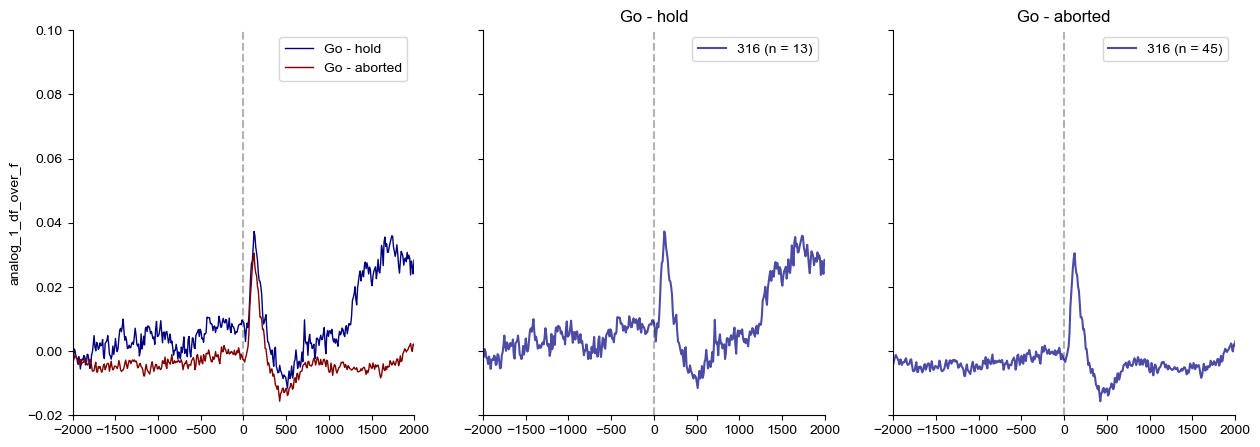

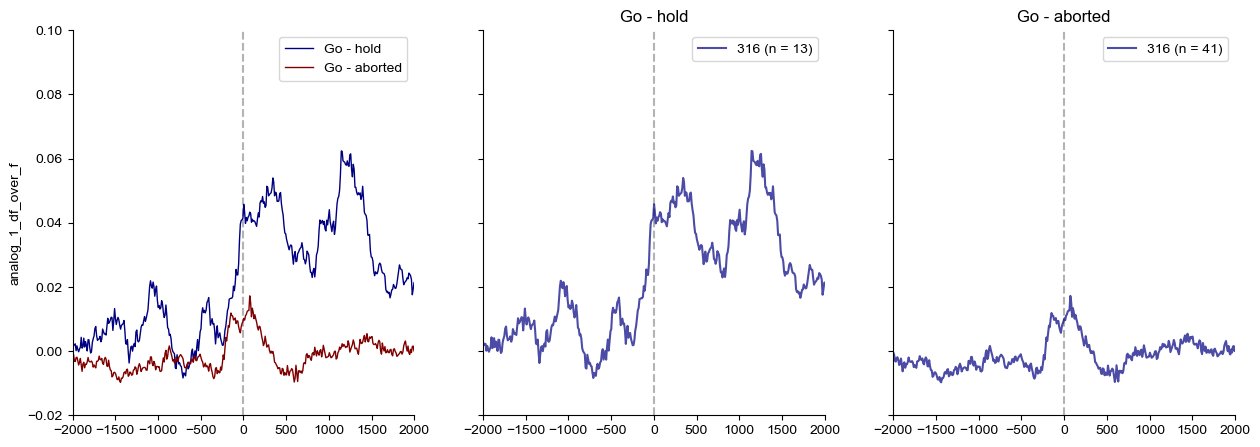

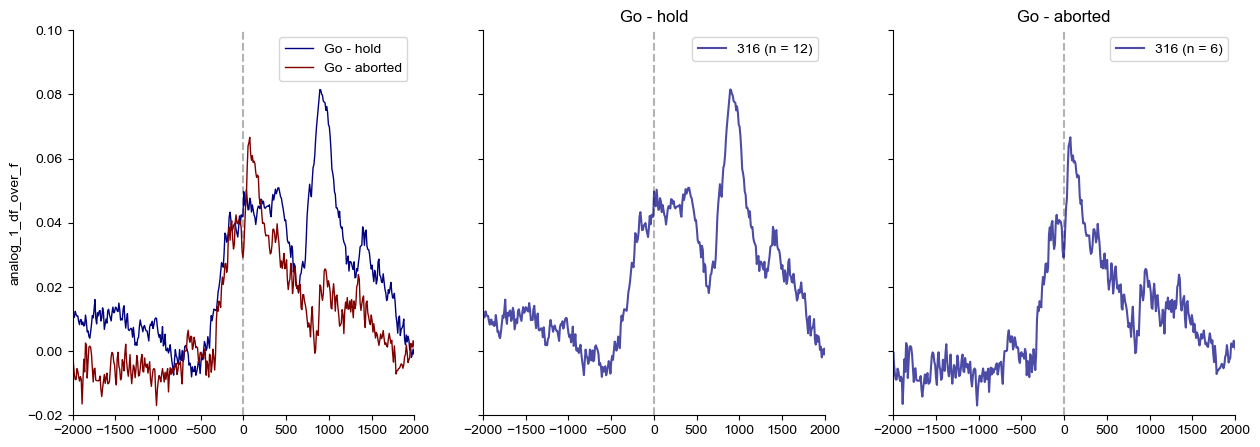

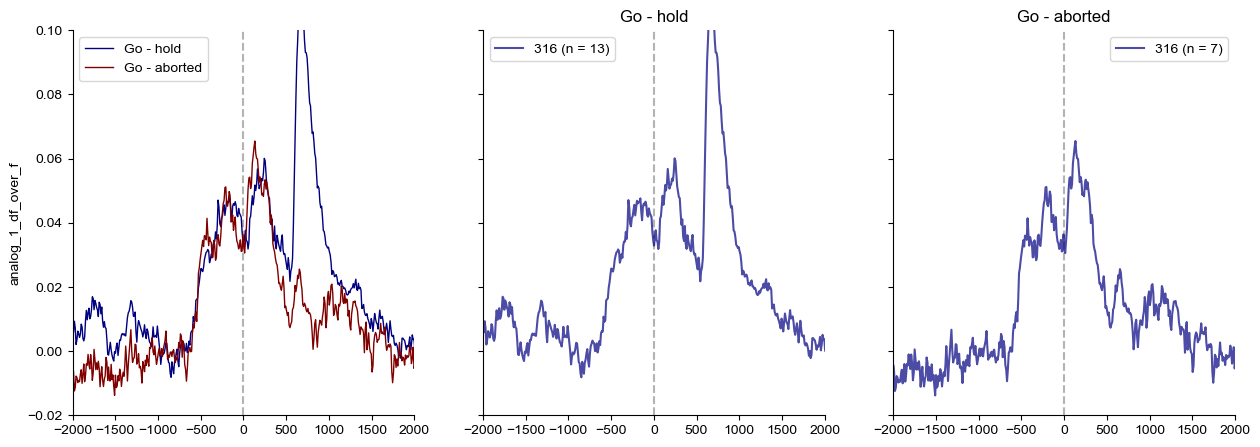

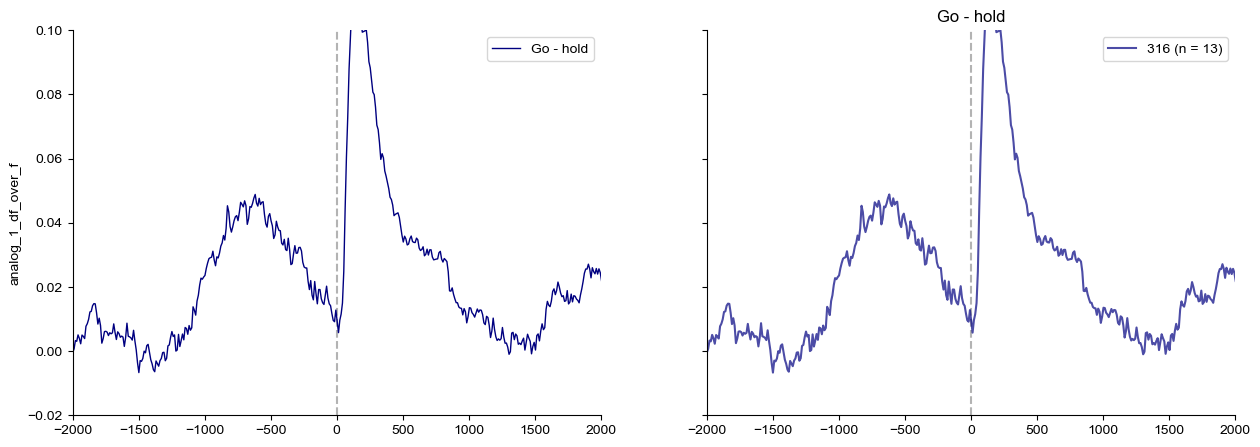

In [106]:

for idx, trig in enumerate(trigs):

    # keep only 316
    photo_dataset[idx].filter_reset()
    photo_dataset[idx].filterout_subjects([0,1,313,314,317,318])
    photo_dataset[idx].filterout_dates(bad_days)
    photo_dataset[idx].filter_lastNsessions(n = 5)
    if idx == 4:
        photo_dataset[idx].filterout_conditions(1)
    photo_dataset[idx].lineplot(
        vars = ['analog_1_df_over_f'],
        time_lim = [-2000, 2000],
        # time_unit = 'seconds',
        ylim = [[-0.02, 0.10]],# [[-0.004, 0.006]],#[[-0.03, 0.1]],#,[-0.005, 0.007]],#[[-0.001, 0.0011],[-0.001, 0.0011]],
        error = True,
        colormap = 'jet',
        legend = True,
        plot_subjects = True,
        plot_groups = True,
        liney0 = False,
        linex0 = True,
        figsize = (15, 5),
        dpi = 100,
        verbose = True)

Same plot, heatmap version:

- 1: Trial onset (CS-onset = hold period start)
- 2: First bar_off
- 3: Last bar_off before spout
- 4: First spout
- 5: Reward (US_end_timer)

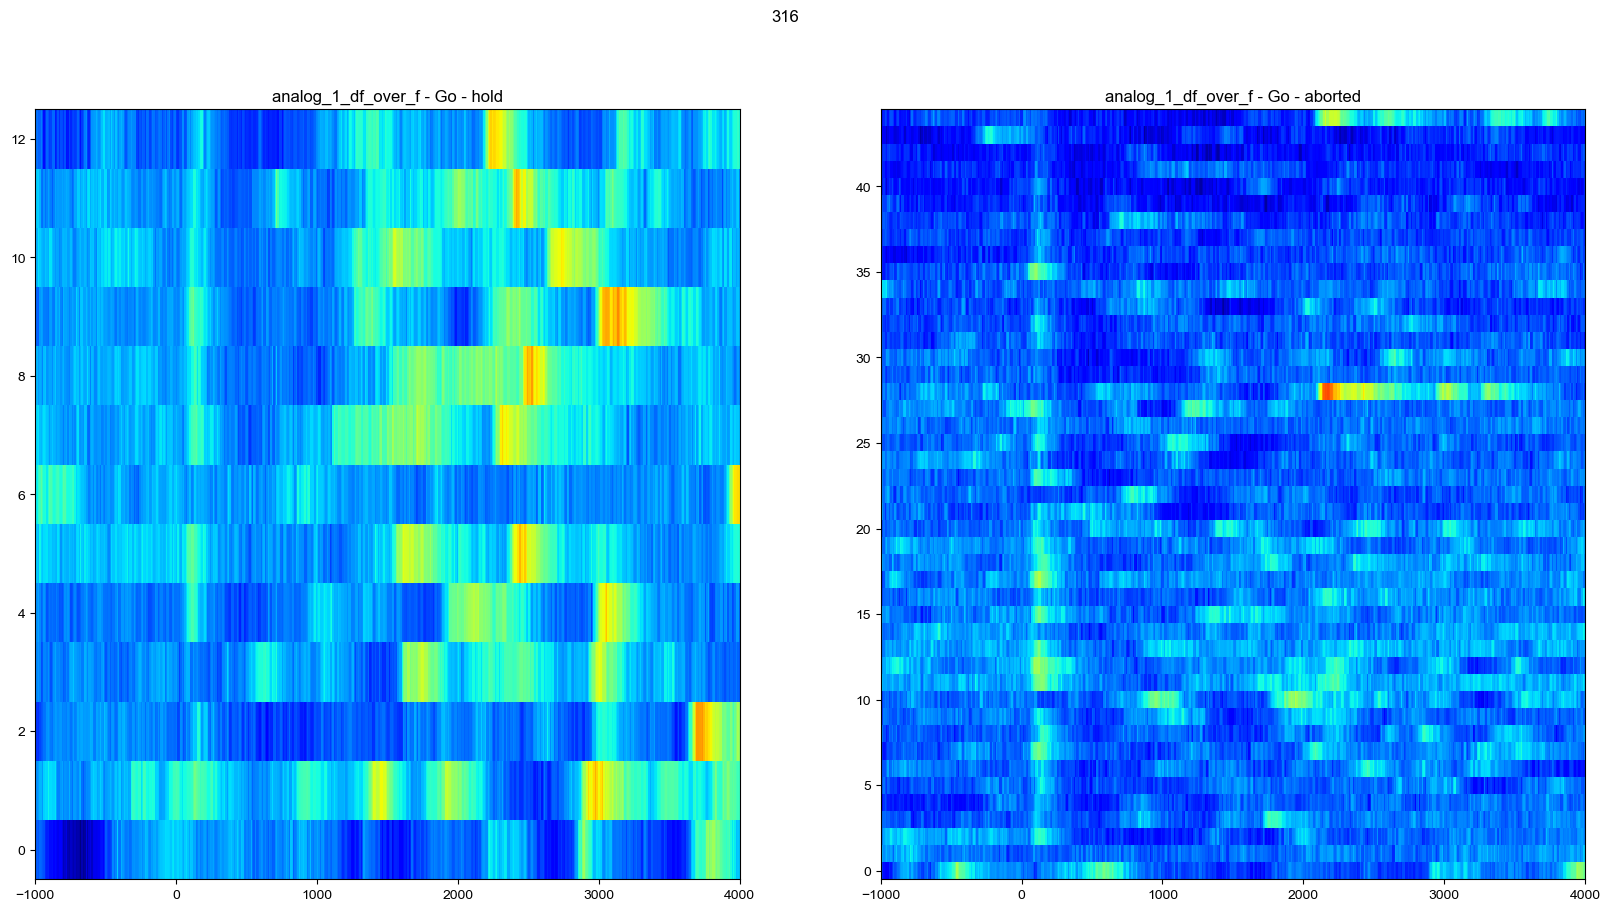

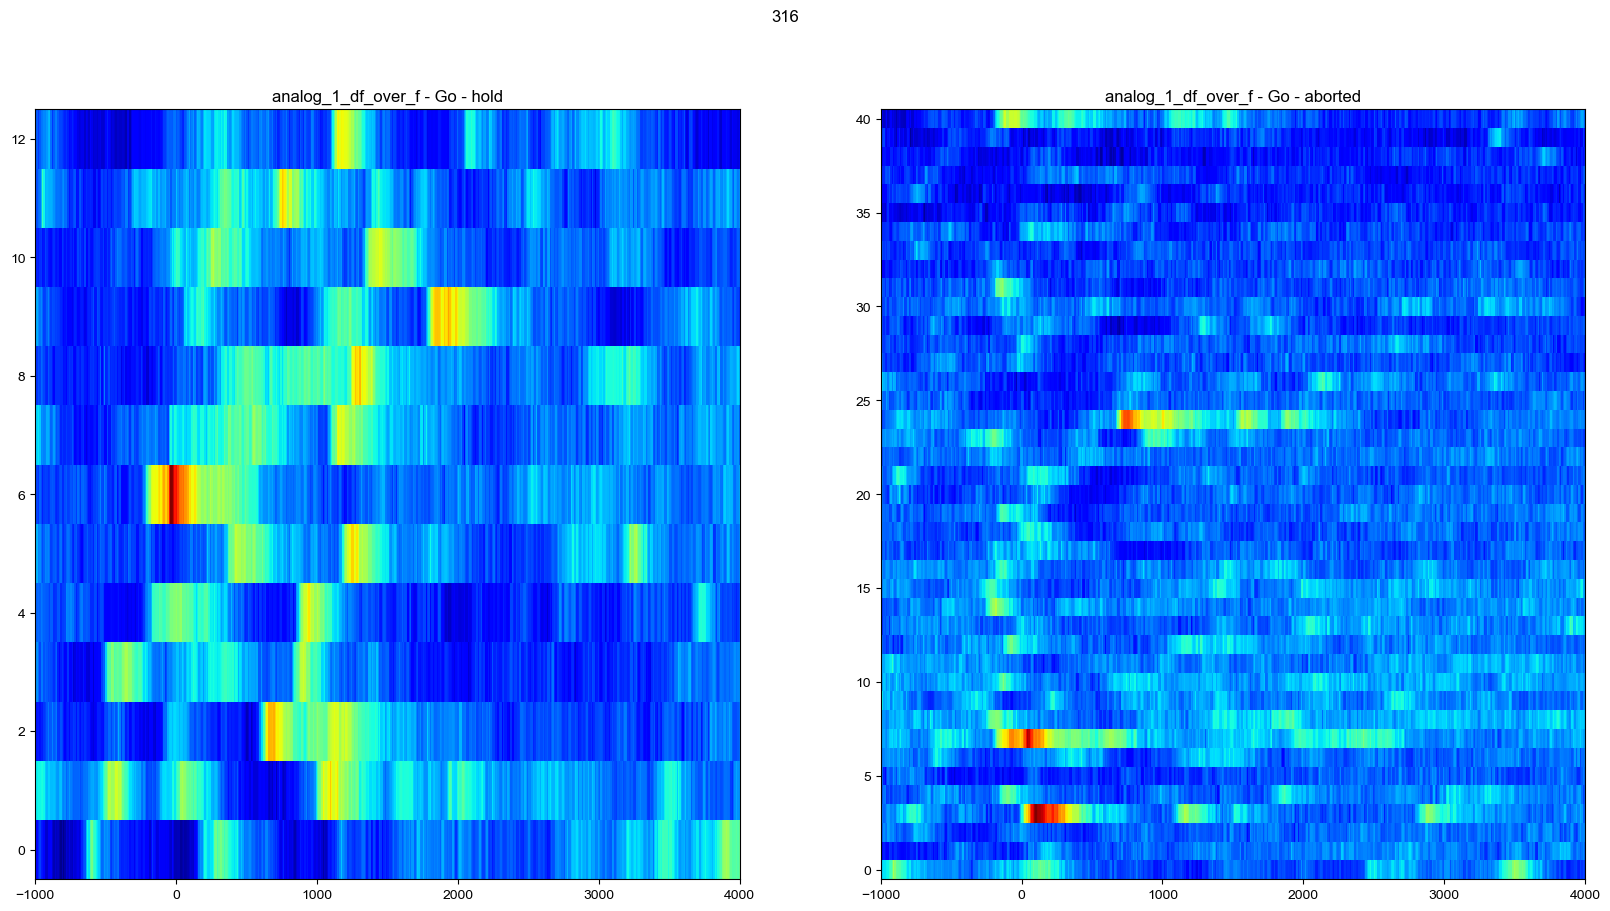

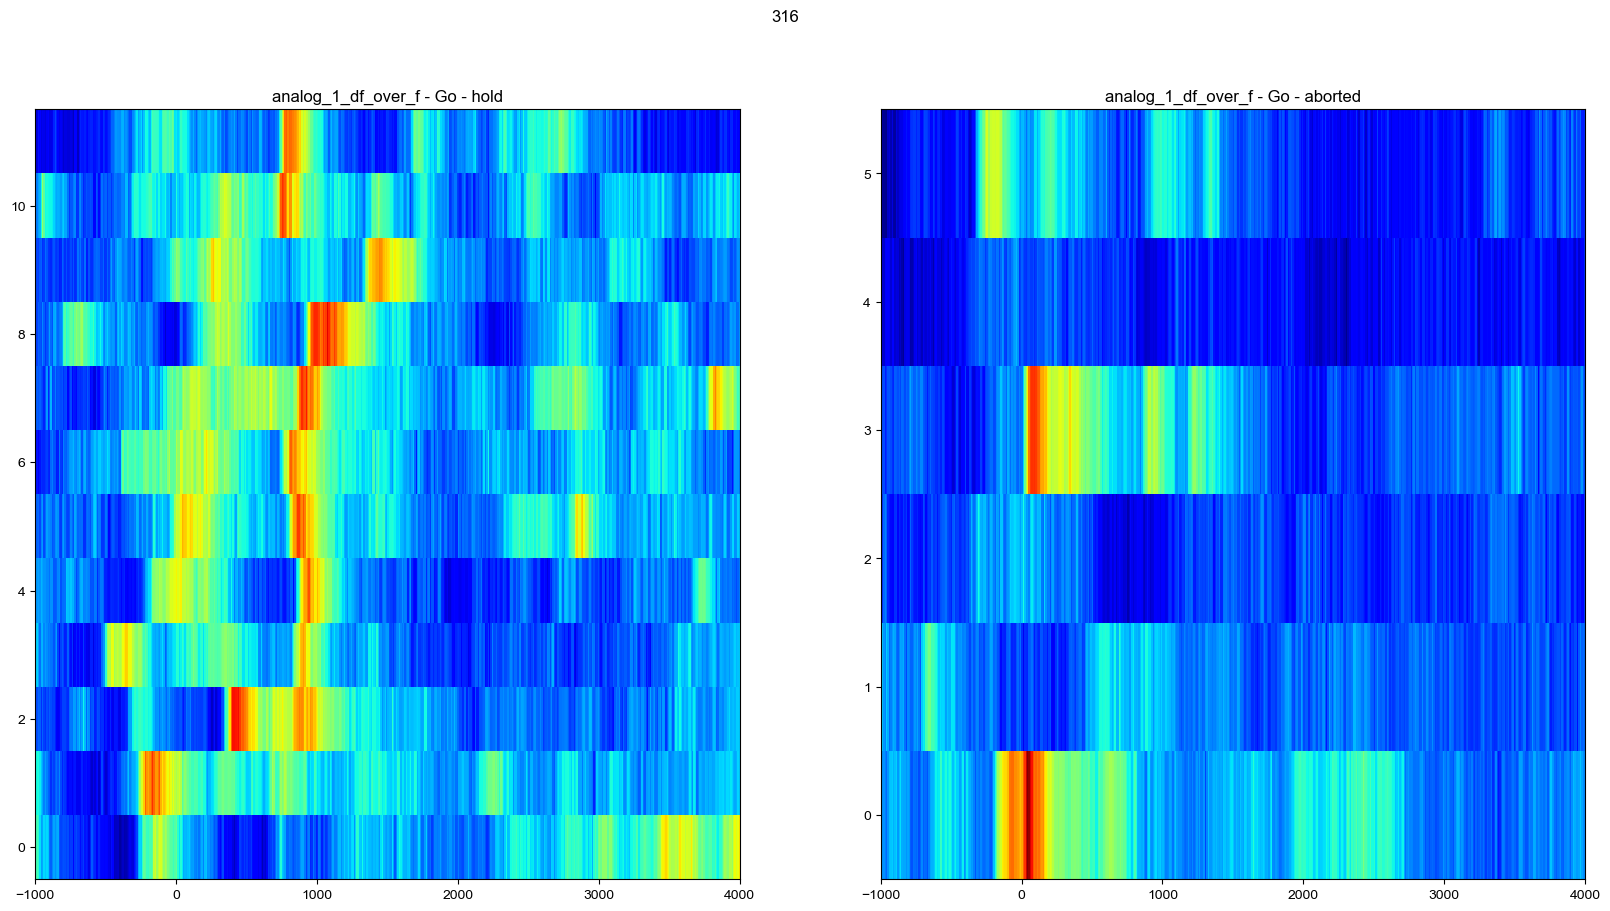

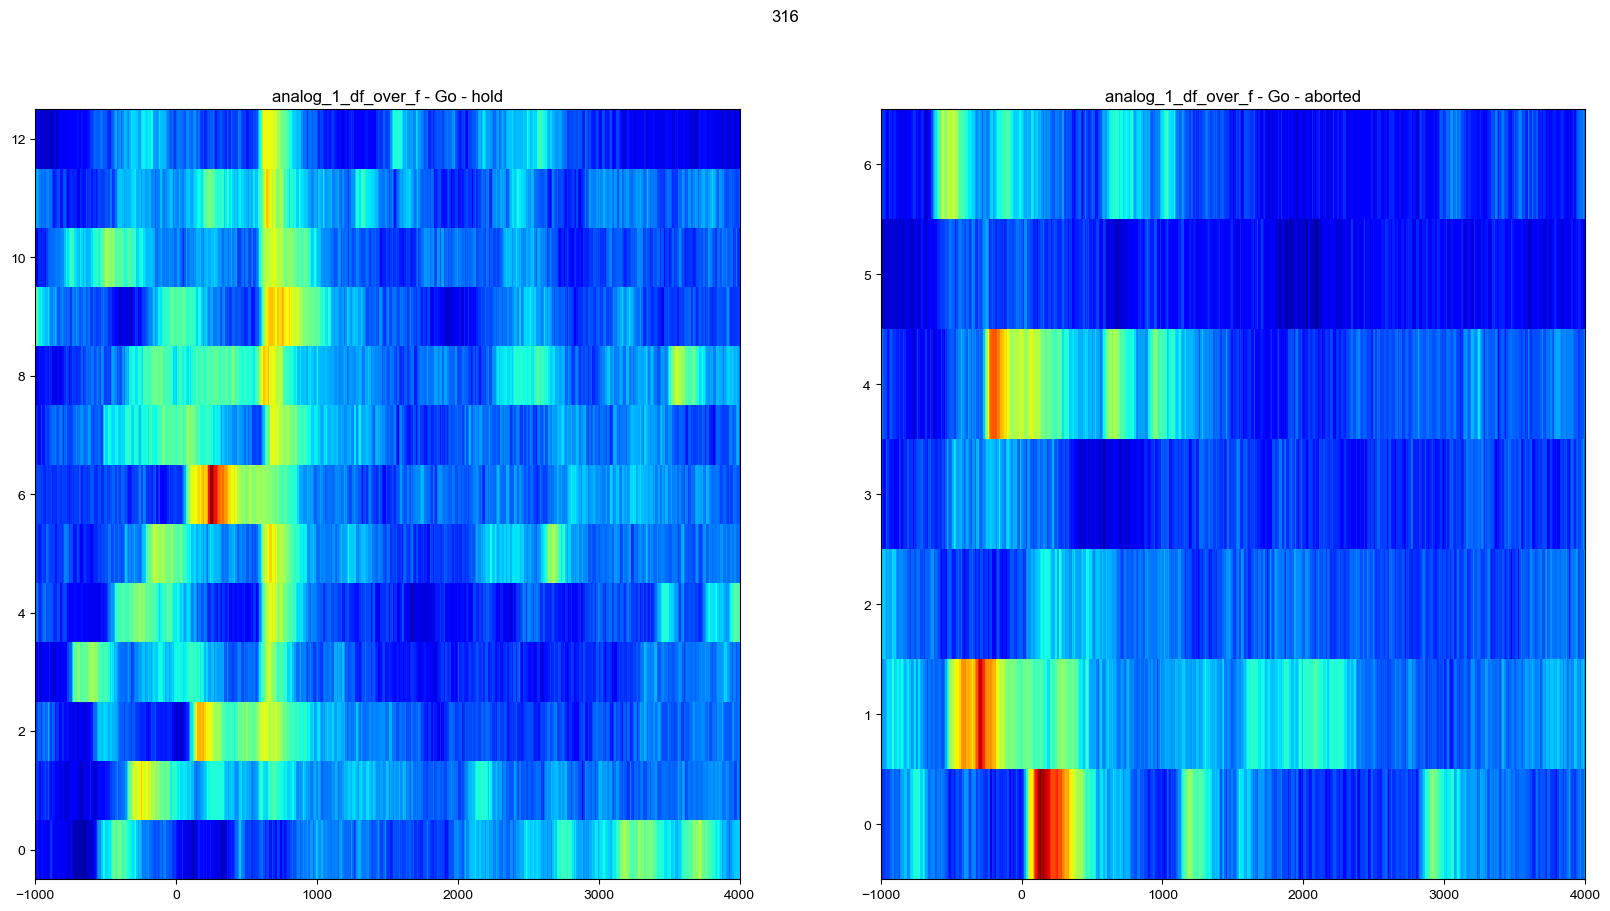

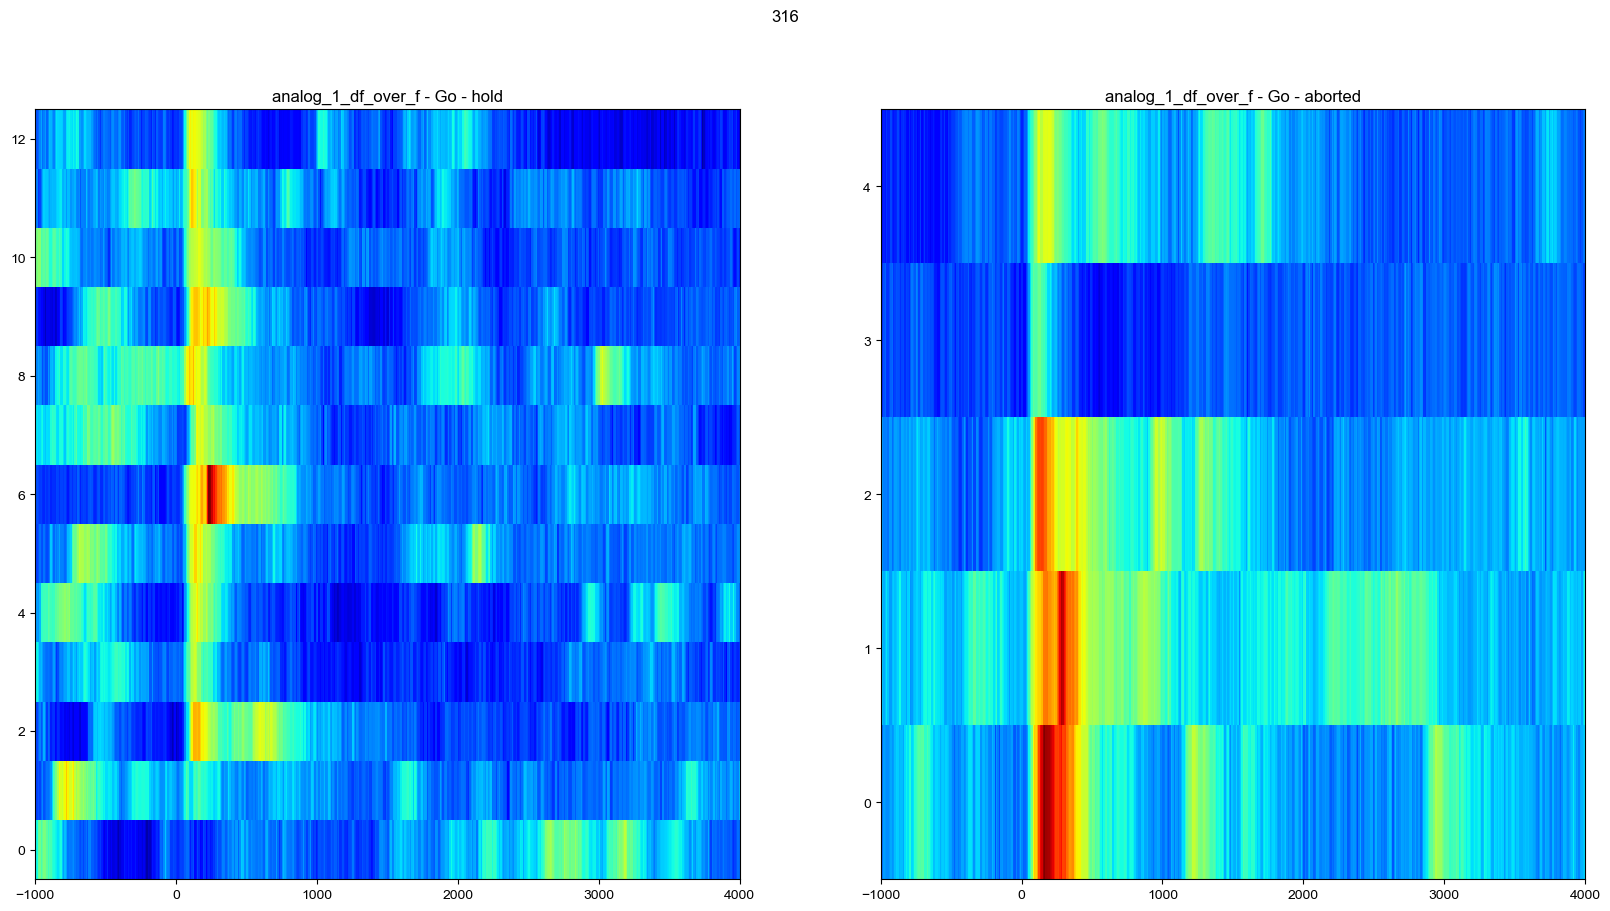

In [107]:
for idx, trig in enumerate(trigs):
    photo_dataset[idx].filter_reset()
    photo_dataset[idx].filterout_subjects([0,1,313,314,317,318])
    photo_dataset[idx].filterout_dates(bad_days)
    photo_dataset[idx].filter_lastNsessions(n = 10)
    photo_dataset[idx].heatmap(
        vars = ['analog_1_df_over_f'],
        time_lim = [-1000, 4000],
        clim_pctile = None,
        colormap = 'jet'
    )   
    photo_dataset[idx].filter_reset()